# Fronteira Eficiente de Markowitz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime

In [13]:
acoes = ['VVAR3.SA', 'COGN3.SA', 'BBDC4.SA']
dados = web.DataReader(acoes, 'yahoo', '2015-1-1')['Adj Close']

### Calculando os retornos

In [14]:
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

### Calculando a covariância

In [15]:
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

### Listas para armanezar as principais variáveis

In [16]:
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [17]:
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [18]:
for cada_carteira in range(numero_carteiras):
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    retorno = np.dot(peso, retorno_anual)
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    sharpe = retorno / volatilidade
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [19]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

df = pd.DataFrame(carteira)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

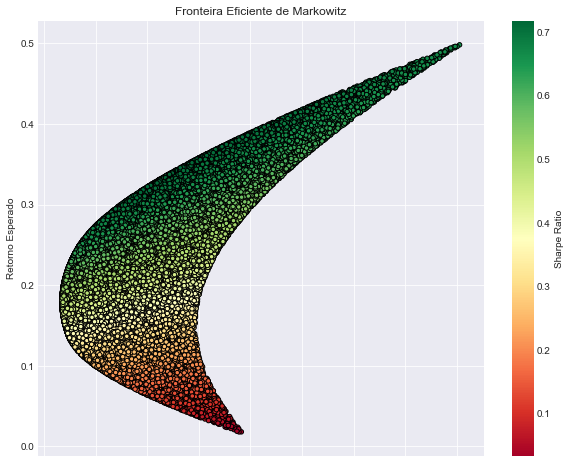

In [20]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [21]:
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

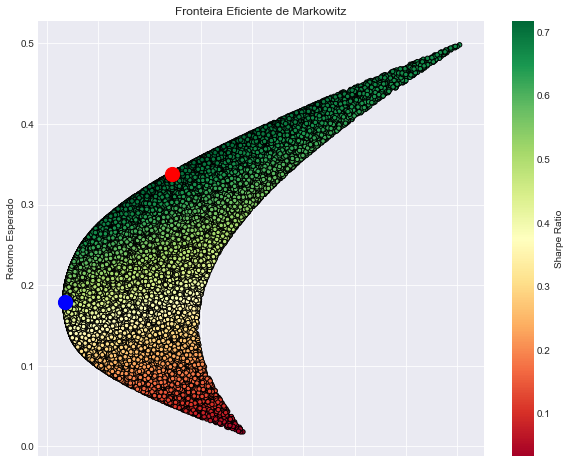

In [22]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [23]:
print ("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print ('\n')
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   63707
Retorno        0.179313
Volatilidade   0.367514
Sharpe Ratio   0.487907
VVAR3.SA Peso  0.081867
COGN3.SA Peso  0.162087
BBDC4.SA Peso  0.756046


Essa é a carteira com maior Sharpe Ratio: 
                   40594
Retorno        0.338571
Volatilidade   0.471939
Sharpe Ratio   0.717405
VVAR3.SA Peso  0.495944
COGN3.SA Peso  0.000124
BBDC4.SA Peso  0.503932
